# Linear Regression

Linear regression Linear regression  is a statistical method used in machine learning and statistics to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the independent variables (features) and the dependent variable (target).


The general form of a linear regression model with one independent variable is:

\( y = mx + b \).

where:

        y is the dependent variable.

        x is the independent variable.

        m is the slope of the line.

        b is the y-intercept.

For multiple independent variables, the equation becomes a hyperplane:

\( y = b + m1.x1 + m2.x2 +.... + m_n.x_n \)


# Building Linear Regression Model using `sklearn`

Below mentioned are the steps to be followed:
1. Load the data
2. Data Preparation - train-test Split, Normalisation or Rescaling
3. Training the Model
4. Prediction
5. Evaluation

### 1. Load the data

In [39]:
# Importing the required libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data 
df = pd.read_csv('data/student_scores.csv')

#show top 5 records
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# find the dimensions of dataframe
print(df.shape)

(25, 2)


### 2. Data Preparation

In [5]:
target = df['Scores']
data = df[['Hours']]

In [6]:
data

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [7]:
print(target)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [8]:
# split the data into train and split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.7, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17, 1) (17,)
(8, 1) (8,)


In [9]:
X_train.head()

,Hours
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3


In [10]:
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


### 3. Training the model

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print('y intercept: ',regressor.intercept_)
print('slope: ',regressor.coef_)

y intercept:  2.3708153823418883
slope:  [9.78856669]


### 4. Prediction

In [13]:
y_test_pred = regressor.predict(X_test)

In [14]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


<Axes: xlabel='Scores', ylabel='Count'>

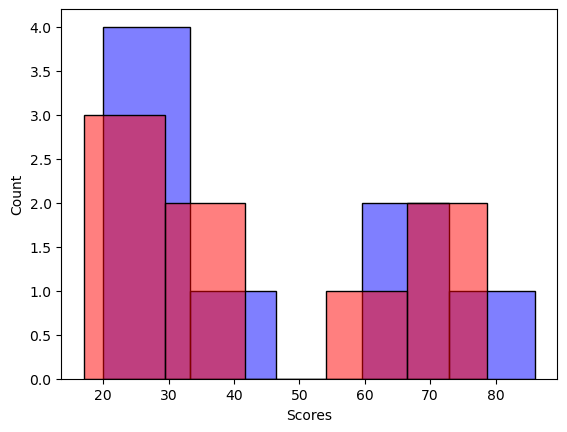

In [15]:
import seaborn as sns

sns.histplot(y_test, color='blue', alpha=0.5, bins=5)
sns.histplot(y_test_pred, color='red', alpha=0.5, bins=5)

### 5. Evaluation

In [16]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4.419727808027651
Mean Squared Error:  22.965097212700428
Root Mean Squared Error:  4.7921912746363144


In [17]:
print(metrics.r2_score(y_test, y_test_pred))

0.9568211104435257


# Building the complete model using `sklearn`!!

Below mentioned are the steps to be followed:
1. Load the data
2. Understand and Viz the data
3. Data Preparation - train-test Split, Normalisation or Rescaling
4. Training the Model
5. Residual Analysis on Training Data
6. Prediction
7. Evaluation

### 1. Loading the Data

In [40]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Read the data
df = pd.read_csv('data/student_scores.csv')

### 2. Understanding and Visuallizing the data

In [20]:
# Show top 5 records
print("Top 5 records of the dataset:")
print(df.head())

Top 5 records of the dataset:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [21]:
# Find the dimensions of the dataframe
print("\nDimensions of the dataframe:")
print(df.shape)


Dimensions of the dataframe:
(25, 2)


In [22]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [23]:
print(df.columns)

Index(['Hours', 'Scores'], dtype='object')


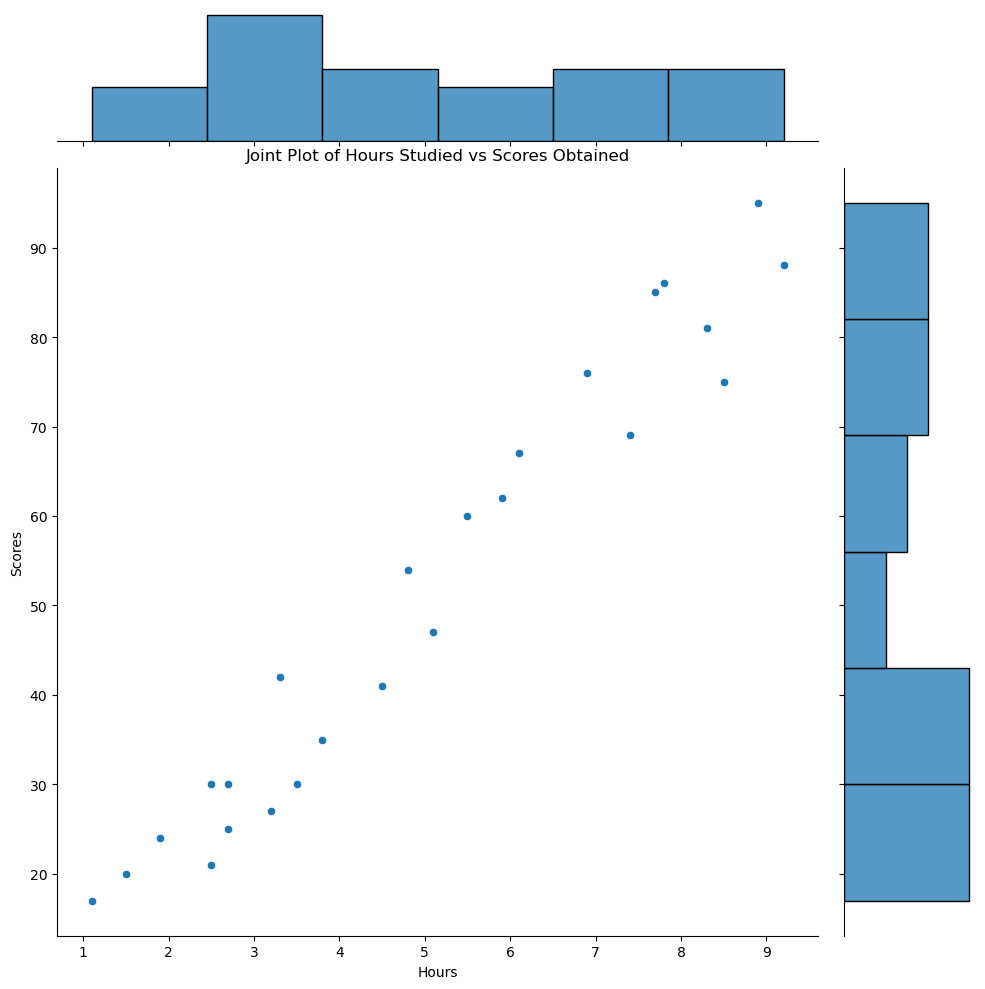

In [24]:
# Jointplot to visualize the relationship between 'Hours' and 'Scores' with increased size
sns.jointplot(x='Hours', y='Scores', data=df, kind='scatter', height=10)
plt.title('Joint Plot of Hours Studied vs Scores Obtained')
plt.show()
#Scatter Plot: Each point in the scatter plot represents an observation in your dataset, with the x-coordinate corresponding to the 'Hours' variable and the y-coordinate corresponding to the 'Scores' variable.

# Marginal Histograms: Along the top and right sides of the scatter plot, you'll find histograms (or kernel density plots) for each individual variable.

In [25]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


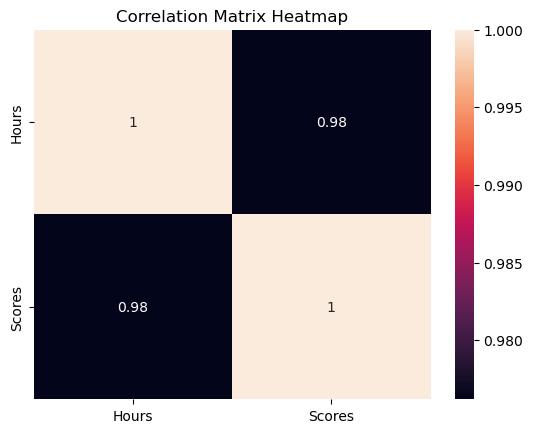

In [26]:
# Correlation matrix heatmap
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


**Positive Correlation:**

A correlation value close to 1 suggests a strong positive correlation.
Example: A correlation coefficient of 0.8 indicates a strong positive relationship.
No Correlation:

A correlation value close to 0 suggests no linear correlation.
Example: A correlation coefficient of 0.1 indicates a weak or negligible correlation.
Negative Correlation:

A correlation value close to -1 suggests a strong negative correlation.
Example: A correlation coefficient of -0.9 indicates a strong negative relationship.


### 3. Data Preparation


In [27]:
# Feature and Target Variable
X = df[['Hours']]
y = df['Scores']

In [28]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

print(X_train.shape)
print(X_test.shape)

(17, 1)
(8, 1)


In [29]:
# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Standardization** is a common preprocessing step in machine learning to ensure that all features have the same scale. This is important for algorithms that are sensitive to the scale of input features, such as support vector machines, k-nearest neighbors, and principal component analysis.

The formula for standardization is given by:

    Standardized Value = (Xᵢ - Mean) / Standard Deviation

Formula for Mean:

    Mean = Sum of(Xᵢ) / Number of Values

Formula for Standard Deviation:

    Standard Deviation = Square Root of [(Sum of (Xᵢ - Mean)²) / Number of Values]




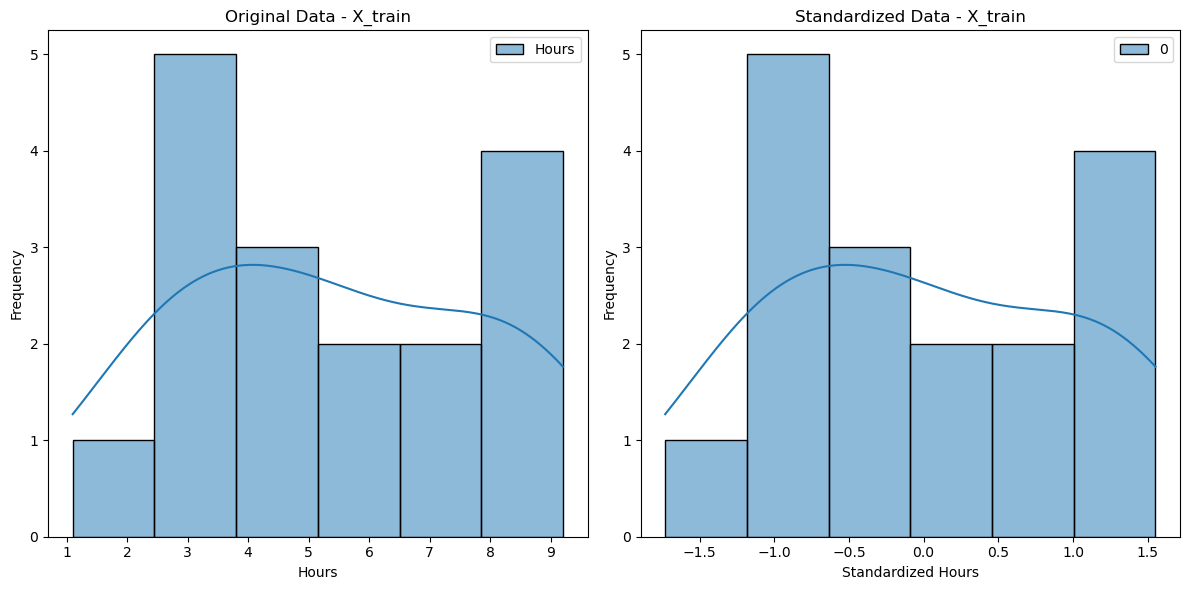

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original Data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(X_train, kde=True)
plt.title('Original Data - X_train')
plt.xlabel('Hours')
plt.ylabel('Frequency')

# Standardized Data
plt.subplot(1, 2, 2)
sns.histplot(X_train_scaled, kde=True)
plt.title('Standardized Data - X_train')
plt.xlabel('Standardized Hours')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 4. Training

In [31]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
# Displaying the coefficients and intercept
print('\nModel Coefficients and Intercept:')
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)


Model Coefficients and Intercept:
Coefficients: [9.78856669]
Intercept: 2.3708153823418883


### 5. Making the Prediction

In [33]:
# Make predictions on the test set
y_test_pred = regressor.predict(X_test)

In [34]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print(temp_df)

    Actual  Predicted
5       20  17.053665
2       27  33.694229
19      69  74.806209
16      30  26.842232
11      62  60.123359
22      35  39.567369
17      24  20.969092
24      86  78.721636


### 6. Evaluating the Algorithm

In [35]:
# Model Evaluation
from sklearn import metrics

print('\nModel Evaluation Metrics:')
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))



Model Evaluation Metrics:
Mean Absolute Error:  4.419727808027651
Mean Squared Error:  22.965097212700428
Root Mean Squared Error:  4.7921912746363144


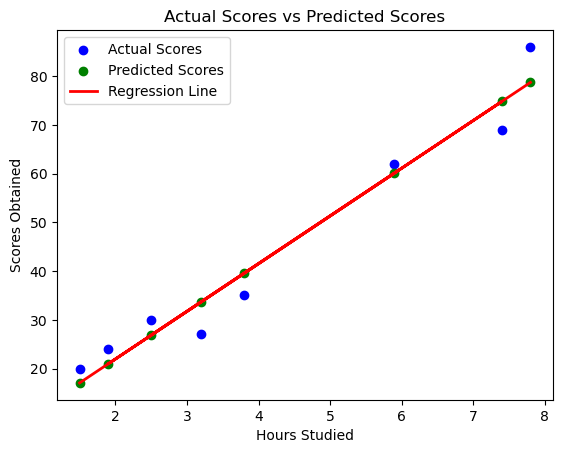

In [36]:
# Visualizing the Regression Line
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.scatter(X_test, y_test_pred, color='green', label='Predicted Scores')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Actual Scores vs Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.legend()
plt.show()


In [37]:
# Cross-validation is a resampling technique used to evaluate machine learning models on a limited data sample.

# Cross-Validation
from sklearn.model_selection import cross_val_score

# Create a Linear Regression model
model = regressor

# Perform 5-fold cross-validation and use mean squared error as the scoring metric
cv_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

# The result is an array of scores for each fold
print('Cross-Validation Scores:', cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = np.mean(cv_scores)
std_score = np.std(cv_scores)

print(f'Mean CV Score: {mean_score}, Standard Deviation: {std_score}')
"""
estimator: The machine learning model or algorithm for which you want to perform cross-validation.

X: The feature matrix.

y: The target variable.

cv (optional): Determines the cross-validation splitting strategy. It can be an integer specifying the number of folds (e.g., 5 for 5-fold cross-validation) or a cross-validation splitter.

scoring (optional): The metric used to evaluate the performance of the model for each iteration of cross-validation. It can be a string (e.g., 'accuracy', 'mean_squared_error', etc.) or a custom scoring function.

n_jobs (optional): The number of CPU cores to use for cross-validation. Set to -1 to use all available cores.


"""

Cross-Validation Scores: [-51.95549224 -68.9781918  -18.44540665 -29.16935926 -37.12909925
 -24.99195148 -19.20799298 -20.59407497 -21.41511744 -62.36432207]
Mean CV Score: -35.425100814692485, Standard Deviation: 18.008935220094585


"\nestimator: The machine learning model or algorithm for which you want to perform cross-validation.\n\nX: The feature matrix.\n\ny: The target variable.\n\ncv (optional): Determines the cross-validation splitting strategy. It can be an integer specifying the number of folds (e.g., 5 for 5-fold cross-validation) or a cross-validation splitter.\n\nscoring (optional): The metric used to evaluate the performance of the model for each iteration of cross-validation. It can be a string (e.g., 'accuracy', 'mean_squared_error', etc.) or a custom scoring function.\n\nn_jobs (optional): The number of CPU cores to use for cross-validation. Set to -1 to use all available cores.\n\n\n"

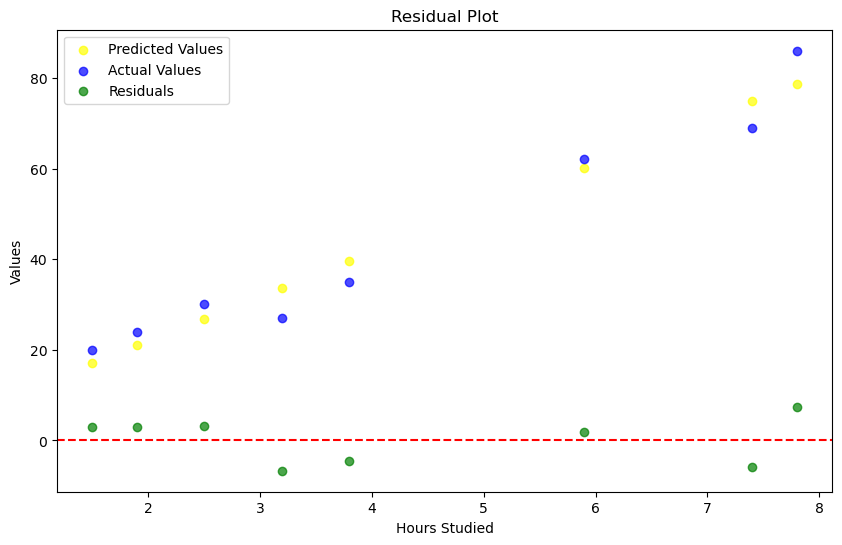

In [38]:
# Residual Plot for Model Evaluation
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))

# Scatter plot for predicted values (in yellow)
plt.scatter(X_test, y_test_pred, color='yellow', label='Predicted Values', alpha=0.7)

# Scatter plot for actual values (in blue)
plt.scatter(X_test, y_test, color='blue', label='Actual Values', alpha=0.7)

# Scatter plot for residuals (in green)
plt.scatter(X_test, residuals, color='green', label='Residuals', alpha=0.7)

# Title and labels
plt.title('Residual Plot')
plt.xlabel('Hours Studied')
plt.ylabel('Values')
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at y=0
plt.legend()  # Show legend

plt.show()


Interpretation Guidelines Residual Plot:

If the residuals exhibit a random scatter around the y=0 line, it suggests that the model is performing well and making unbiased predictions.
If there is a pattern or trend in the residuals (e.g., a curve or a systematic increase/decrease), it indicates that the model might not be capturing all the information in the data.
Outliers in the residuals may indicate specific observations where the model performs poorly.
Overall, a good residual plot should exhibit:

Random scattering of residuals around the y=0 line.
No clear patterns or trends in the residuals.
Homoscedasticity, meaning that the spread of residuals should be roughly constant across all levels of the independent variable.

# Scenarios for Linear Regression:

Predictive Modeling: It can be used for predicting a continuous outcome variable based on one or more predictor variables.

Relationship Analysis: Linear regression helps in understanding and quantifying the relationships between variables.

Trend Analysis: It can be used to identify trends and patterns in data.

Economic Forecasting: In finance and economics, linear regression is often used for forecasting.

Risk Assessment: Linear regression can be used to assess the risk associated with certain variables.

# Pros of Linear Regression:



Interpretability: The results are easy to interpret, especially when there are only a few independent variables.

Computationally Inexpensive: Linear regression models are computationally less intensive compared to some other algorithms.

Simple and Fast: It's a simple and fast algorithm that serves as a good baseline model.

No Assumption of Normality: Linear regression does not assume that the independent variables are normally distributed.

# Cons of Linear Regression:

Assumption of Linearity: Linear regression assumes a linear relationship between the dependent and independent variables. If the relationship is nonlinear, the model might not perform well.

Sensitivity to Outliers: Linear regression is sensitive to outliers, and a single outlier can significantly influence the results.

Assumption of Independence: It assumes that the residuals (the differences between observed and predicted values) are independent, which might not always be the case.

Overfitting Issues: If the number of features is much larger than the number of observations, linear regression may suffer from overfitting.

Limited Expressiveness: Linear regression may not capture complex relationships in the data, especially when the relationship is nonlinear.